# Python and Neo4j for Network Science

In this notebook we'll look at how to combine Python and Neo4j to explore a network/graph containing interactions between Game of Thrones characters.

In [73]:
from neo4j.v1 import GraphDatabase, basic_auth
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
driver = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j", "neo"))

## How many characters do we have?

To get started let's run the query which calculates the number of characters in Game of Thrones and print it to the screen.

In [75]:
query = """\
MATCH (c:Character)
RETURN count(c) AS totalCharacters
"""

with driver.session() as session:
    result = session.run(query)
    row = result.peek()
    print("Number of characters: {0}".format(row["totalCharacters"]))        

Number of characters: 187


## What's the distribution of interactions by characters? 

We can combine Neo4j and matplotlib to create a histogram that shows how interactions are spread out across our characters.

In [76]:
query = """\
MATCH (c:Character)--()
RETURN c, count(*) AS numberOfInteractions
"""

with driver.session() as session:
    result = session.run(query)
    interactions = [row["numberOfInteractions"] for row in result]        

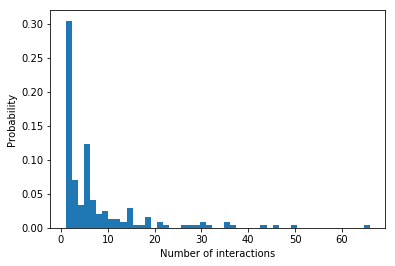

In [77]:
plt.hist(interactions, normed=True, bins=50)
plt.ylabel('Probability');
plt.xlabel('Number of interactions');
plt.show()

Unsurprisingly the majority of characters don't say much! This looks like a classic long tail/power law chart.

## Querying with Pandas

We can take the results of Cypher queries and do further processing using the Pandas library.

For example here we find the first 5 rows using the Pandas `head()` function

In [78]:
query = """\
match (c:Character) 
return c.name AS name, size((c)--()) AS interactions
"""

with driver.session() as session:
    result = session.run(query)

df = pd.DataFrame([dict(record) for record in result])
print(df.head())

   interactions                             name
0             2                   Addam-Marbrand
1             2                Aegon-I-Targaryen
2             7  Aemon-Targaryen-(Maester-Aemon)
3             6               Aerys-II-Targaryen
4             6                             Aggo


We could do our filtering using Pandas as well. The following code finds some of the characters who have more than 5 different interactions:

In [79]:
df.query('interactions>5').head()

,interactions,name
2,7,Aemon-Targaryen-(Maester-Aemon)
3,6,Aerys-II-Targaryen
4,6,Aggo
6,10,Alliser-Thorne
9,27,Arya-Stark


We can find the characters with the least interactions as well:

In [82]:
df.query('1 < interactions <5').sort_values(by=["interactions"], ascending = True).head()

,interactions,name
0,2,Addam-Marbrand
97,2,Maege-Mormont
96,2,Mace-Tyrell
129,2,Shae
180,2,Will-(prologue)
